# Week 7 - HMM Implementation

We're going to look at heart rate measurements made over the course of a day, when the subject slept, generally rested, and also went cycling.

In [23]:
%matplotlib inline
!pip install hmmlearn

import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 47, 46, 45, 45, 45, 63, 63, 48, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 46, 47, 48, 49, 49, 49, 42, 42, 42, 42, 42, 42, 46, 49, 52, 58, 58, 58, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 47, 49, 49, 49, 47, 46, 45, 45, 45, 45, 56, 56, 56, 49, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 45, 45, 45, 49, 49, 49, 49, 49, 49, 43, 43, 43, 44, 44, 44, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 49, 49, 49, 45, 45, 45, 52, 52, 52, 46, 45, 44, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 46, 46, 46, 48, 48, 48, 47, 47, 47, 47, 48, 49, 50, 50, 50, 48, 48, 48, 49, 49, 49, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 46, 46, 46, 44, 44, 44, 48, 48, 48, 47, 46, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 54, 54, 54, 43, 43, 43, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43, 43, 43, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 49, 51, 54, 54, 54, 46, 46, 46, 47, 47, 47, 46, 46, 46, 47, 47, 47, 45, 45, 45, 49, 49, 49, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 51, 51, 51, 45, 45, 45, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 48, 50, 55, 55, 55, 48, 47, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 49, 50, 53, 53, 53, 50, 50, 50, 53, 53, 53, 50, 49, 48, 48, 48, 48, 69, 69, 69, 62, 58, 54, 50, 50, 50, 50, 50, 50, 50, 50, 50, 53, 53, 53, 49, 49, 49, 50, 51, 52, 55, 55, 55, 52, 51, 50, 50, 50, 50, 50, 50, 50, 59, 59, 67, 67, 68, 68, 68, 60, 60, 60, 95, 95, 95, 90, 90, 90, 114, 125, 136, 144, 144, 144, 136, 135, 134, 134, 134, 134, 145, 145, 145, 127, 127, 127, 131, 135, 139, 147, 147, 147, 133, 128, 123, 125, 121, 117, 106, 106, 106, 126, 132, 138, 136, 138, 140, 141, 141, 141, 139, 139, 139, 140, 141, 142, 141, 142, 143, 155, 155, 155, 153, 152, 151, 148, 148, 148, 156, 156, 156, 154, 152, 150, 149, 148, 147, 146, 145, 144, 142, 141, 140, 139, 139, 139, 139, 139, 139, 143, 143, 143, 142, 141, 140, 139, 139, 139, 139, 139, 139, 142, 143, 144, 145, 145, 145, 125, 125, 125, 147, 147, 147, 146, 144, 142, 136, 136, 136, 142, 142, 142, 142, 142, 142, 133, 126, 119, 113, 107, 101, 94, 94, 94, 94, 95, 96, 95, 100, 105, 132, 136, 140, 140, 140, 140, 139, 136, 133, 126, 126, 126, 141, 142, 143, 143, 143, 143, 143, 144, 145, 145, 147, 149, 153, 153, 153, 132, 120, 108, 91, 91, 91, 91, 98, 105, 128, 135, 142, 142, 142, 142, 138, 136, 134, 134, 134, 134, 144, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 149, 149, 149, 146, 146, 146, 147, 148, 149, 153, 153, 153, 153, 153, 153, 152, 151, 150, 150, 149, 148, 149, 147, 145, 132, 125, 118, 114, 114, 114, 140, 140, 140, 138, 135, 132, 127, 123, 119, 117, 115, 113, 114, 111, 108, 100, 100, 100, 100, 100, 100, 98, 98, 98, 105, 105, 105, 105, 105, 105, 112, 112, 112, 101, 97, 93, 91, 91, 91, 104, 104, 104, 99, 99, 99, 99, 103, 107, 134, 134, 134, 133, 133, 133, 133, 135, 137, 147, 147, 147, 144, 144, 144, 151, 151, 151, 149, 148, 147, 146, 146, 146, 146, 146, 146, 145, 138, 131, 115, 112, 109, 109, 109, 88, 88, 81, 81, 81, 85, 90, 95, 106, 106, 106, 84, 84, 84, 94, 98, 102, 103, 103, 103, 78, 74, 70, 70, 70, 70, 78, 78, 78, 78, 77, 76, 74, 74, 74, 75, 75, 75, 75, 75, 75, 93, 93, 93, 83, 83, 83, 85, 85, 71, 71, 63, 63, 63, 79, 79, 79, 66, 63, 60, 60, 60, 60, 60, 61, 62, 63, 63, 63, 62, 62, 62, 63, 64, 65, 65, 65, 65, 62, 62, 62, 69, 72, 75, 72, 76, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 86, 81, 76, 74, 71, 68, 66, 64, 62, 63, 62, 61, 60, 60, 60, 60, 62, 64, 76, 76, 76, 70, 68, 66, 65, 65, 65, 71, 71, 71, 71, 69, 67, 62, 62, 62, 74, 74, 74, 74, 74, 74, 74, 72, 70, 66, 65, 64, 64, 64, 64, 80, 84, 88, 88, 88, 88, 88, 88, 88, 82, 79, 76, 78, 75, 72, 65, 64, 63, 63, 63, 63, 64, 64, 64, 63, 63, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 63, 63, 63, 66, 72, 78, 94, 94, 94, 92, 92, 92, 92, 92, 92, 83, 83, 83, 88, 88, 88, 81, 78, 75, 74, 74, 74, 75, 75, 75, 71, 69, 67, 68, 67, 66, 67, 66, 65, 62, 62, 62, 65, 65, 65, 65, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 62, 65, 68, 77, 77, 77, 58, 58, 58, 58, 62, 66, 89, 89, 89, 88, 88, 78, 78, 78, 78, 78, 60, 60, 60, 60, 60, 60, 56, 56, 56, 57, 57, 57, 55, 55, 55, 55, 56, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 58, 58, 58, 58, 58, 60, 60, 60, 59, 58, 57, 56, 56, 56, 61, 61, 61, 59, 59, 59, 62, 62, 62, 62, 61, 60, 59, 59, 59, 76, 76, 76, 76, 73, 70, 57, 57, 57, 59, 59, 59, 59, 59, 59, 56, 56, 56, 62, 62, 62, 59, 57, 55, 54, 54, 54, 55, 56, 57, 56, 57, 58, 60, 60, 60, 56, 56, 56, 62, 66, 70, 77, 77, 77, 66, 62, 58, 58, 58, 58, 58, 58, 58, 57, 56, 55, 54, 54, 54, 54, 55, 56, 56, 57, 58, 59, 60, 61, 61, 61, 61, 55, 55, 55, 58, 58, 58, 56, 56, 56, 58, 61, 64, 69, 69, 69, 55, 55, 55, 68, 68, 68, 58, 57, 56, 56, 56, 56, 55, 55, 55, 56, 59, 62, 68, 68, 68, 66, 64, 62, 58, 56, 54, 54, 54, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 60, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 62, 66, 66, 66, 59, 58, 57, 58, 57, 56, 55, 55, 55, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 61, 66, 66, 66, 63, 62, 61, 60, 60, 60, 62, 62, 62, 59, 59, 59, 59, 59, 59, 61, 61, 61, 59, 59, 59, 59, 60, 61, 66, 70, 74, 82, 82, 82, 55, 55, 55, 55, 55, 55, 56, 57, 58, 57, 61, 65, 82, 82, 82, 59, 56, 53, 53, 53, 53, 53, 54, 55, 56, 56, 56, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 61, 60, 57, 57, 57, 68, 68, 68, 63, 63, 63, 63, 63, 63, 60, 60, 60, 65, 65, 65, 62, 62, 62, 66, 66, 66, 63, 63, 63, 71, 71, 71, 60, 60, 60, 60, 60, 60, 59, 59, 59, 61, 61, 61, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 63, 63, 63, 61, 61, 61, 62, 62, 62, 62, 61, 60, 59, 59, 59, 60, 60, 60, 59, 59, 59, 58, 58, 58, 57, 57, 57, 57, 57, 57, 59, 60, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 61, 62, 63, 63, 63, 63, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 62, 63, 62, 63, 64, 89, 89, 89, 81, 78, 75, 74, 74, 74, 79, 81, 83, 83, 83, 83, 83, 81, 79, 73, 70, 67, 64, 64, 64, 64, 64, 64, 62, 62, 62, 65, 65, 65, 64, 64, 64, 63, 63, 63, 64, 64, 64, 62, 61, 60, 60, 60, 60, 61, 64, 67, 70, 74, 78, 83, 83, 83, 60, 60, 60, 63, 63, 63, 61, 61, 61, 69, 69, 69, 64, 63, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 60, 60, 60, 58, 58, 58, 61, 62, 63, 63, 65, 67, 74, 74, 74, 67, 67, 67, 69, 73, 77, 80, 86, 92, 104, 104, 104, 95, 90, 85, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 76, 74, 71, 71, 71, 73, 73, 73, 68, 65, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 54, 54, 54, 59, 59, 59, 57, 57, 57, 57, 57, 57, 58, 58, 58, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 61, 61, 57, 57, 57, 59, 59, 59, 58, 58, 58, 58, 58, 58, 52, 52, 52, 70, 70, 70, 70, 70, 70, 67, 66, 65, 64, 63, 62, 63, 62, 61, 54, 54, 54, 57, 57, 57, 57, 57, 57, 56, 55, 54, 52, 52, 52, 56, 56, 56, 56, 56, 56, 55, 55, 55, 61, 61, 61, 61, 61, 61, 64, 65, 66, 67, 67, 67, 50, 49, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 52, 52, 53, 54, 55, 56, 57, 60, 60, 60, 56, 55, 54, 55, 54, 53, 52, 52, 52, 56, 56, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 58, 58, 58, 50, 50, 50, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 49, 49, 49, 49, 49, 49, 50, 52, 54, 60, 60, 60, 50, 49, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48], dtype=np.float)

/var/folders/2v/rqzdmr5s1q1d9vqx9sm4tn600000gn/T/ipykernel_68400/118138004.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 

#### (1) Load the data and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

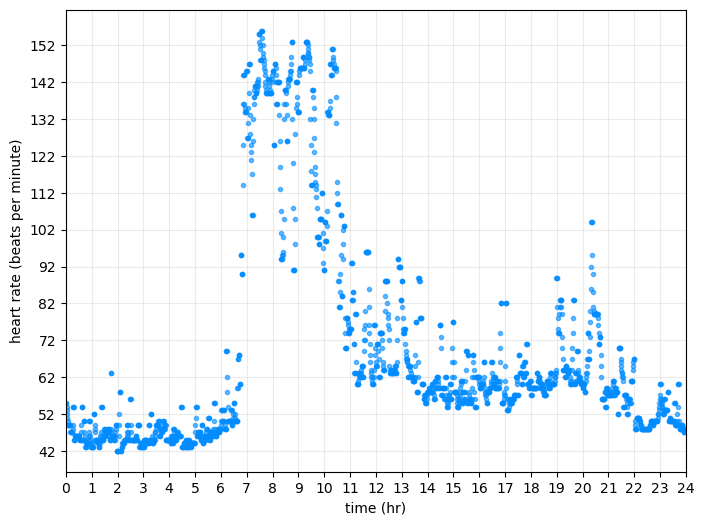

In [41]:
time = np.linspace(0, 24, hr.shape[0])
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.set_xlim(0, 24)
ax.set_xticks(np.arange(0, 25, 1))
ax.set_yticks(np.arange(min(hr), max(hr), 10))
ax.grid(True, alpha=0.25)
ax.plot(time, hr, '.', alpha=0.6, color="#008CFF")
ax.set_ylabel('Heart rate (beats per minute)')
ax.set_xlabel('Time (hr)')
plt.show()


#### (2) Do you see regions where there might be differences in behavior?

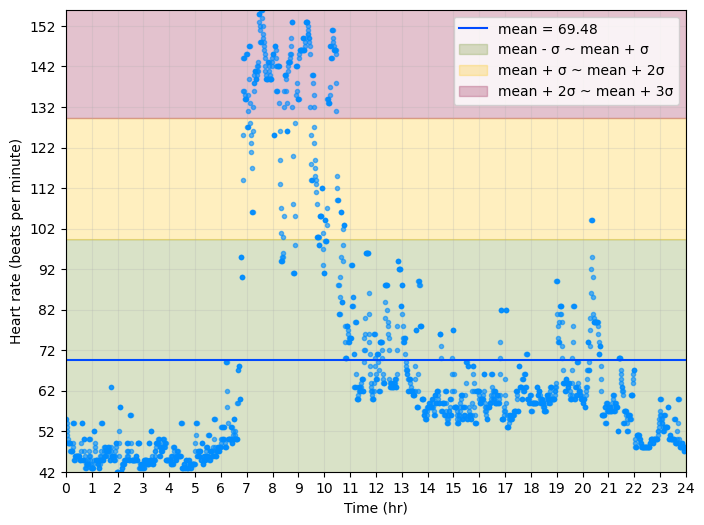

In [25]:
hr_mean = hr.mean()
hr_std = hr.std()

plt.figure(figsize=(8, 6), dpi=100)
plt.xlim(0, 24)
plt.ylim(hr.min(), hr.max())
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(min(hr), max(hr), 10))
plt.grid(True, alpha=0.25)
plt.plot(time, hr, '.', alpha=0.6, color="#008CFF")
plt.plot([0,24], [hr_mean, hr_mean], color="#004AFF", label="mean = {}".format(round(hr_mean, 2)))
plt.fill_between(time, hr_mean-hr_std, hr_mean+hr_std, alpha=0.25, color="#6B8E23", label="mean - \u03C3 ~ mean + \u03C3".format(round((hr_mean-hr_std),2), round((hr_mean+hr_std), 2)))
plt.fill_between(time, hr_mean+hr_std, hr_mean+2*hr_std, alpha=0.25,color="#FFC300", label="mean + \u03C3 ~ mean + 2\u03C3".format(round((hr_mean+hr_std), 2), round((hr_mean+2*hr_std), 2)))
plt.fill_between(time, hr_mean+2*hr_std, hr_mean+3*hr_std, alpha=0.25,  color="#900C3F",label="mean + 2\u03C3 ~ mean + 3\u03C3".format(round((hr_mean+2*hr_std), 2), round((hr_mean+3*hr_std), 2)))
plt.legend()
plt.ylabel('Heart rate (beats per minute)')
plt.xlabel('Time (hr)')

plt.xlim(np.min(time), np.max(time))
plt.show()

Yes! The plotted line represents the mean heart rate for the day. Notably, from 9/10pm to 6:40am, the heart rates are consistently lower than at other times. The plot is also divided into three labeled areas, with heart rates being highest between 7:00am and 11:00am. More specifically, this significant increase in heart rate for three hours, can suggest that they engage in a morning exercise routine.






#### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

The simplest emissions to use with `hmmlearn` are Gaussian ones. If our emissions are not Gaussian, we can still transform our data in some way to make it look more like a normal distribution. Given the shape of this distribution, do you think any transformation of the data would be helpful? Justify your answer.

## Histogram of Heart Rates over 24 Hours


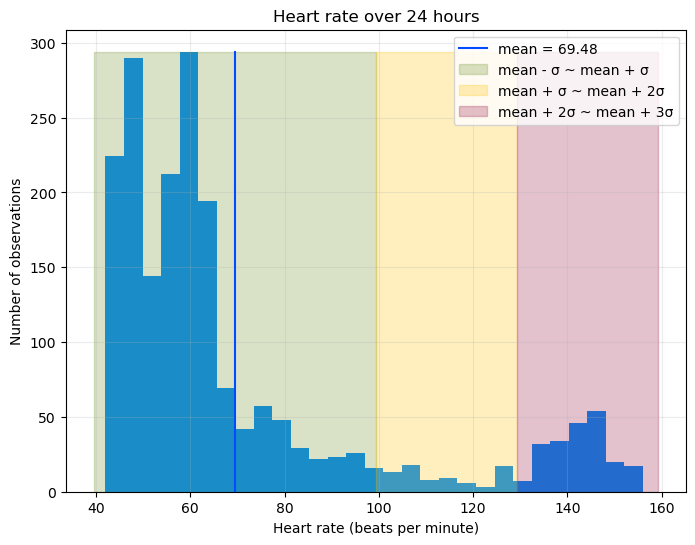

In [46]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title('Heart rate over 24 hours')
hist = plt.hist(hr, bins='auto', color="#008CFF")
ax.set_xlim(0, 24)
ax.set_ylim(hr.min(), hr.max())
ax.set_xticks(np.arange(0, 25, 1))
ax.set_yticks(np.arange(min(hr), max(hr), 10))
plt.xlabel('Heart rate (beats per minute)')
plt.ylabel('Number of observations')

plt.plot([hr_mean, hr_mean], [0,hist[0].max()], color="#004AFF", label="mean = {}".format(round(hr_mean, 2)))
plt.fill_between([hr_mean-hr_std, hr_mean+hr_std],0,hist[0].max(), color="#6B8E23", alpha=0.25, label="mean - \u03C3 ~ mean + \u03C3".format(round((hr_mean-hr_std),2), round((hr_mean+hr_std), 2)))
plt.fill_between([hr_mean+hr_std, hr_mean+2*hr_std],0,hist[0].max(), color="#FFC300", alpha=0.25, label="mean + \u03C3 ~ mean + 2\u03C3".format(round((hr_mean+hr_std), 2), round((hr_mean+2*hr_std), 2)))
plt.fill_between([hr_mean+2*hr_std, hr_mean+3*hr_std],0,hist[0].max(), color="#900C3F", alpha=0.25, label="mean + 2\u03C3 ~ mean + 3\u03C3".format(round((hr_mean+2*hr_std), 2), round((hr_mean+3*hr_std), 2)))
plt.legend()

plt.grid(True, alpha=0.25)


## Histogram of Resting Heart Rates


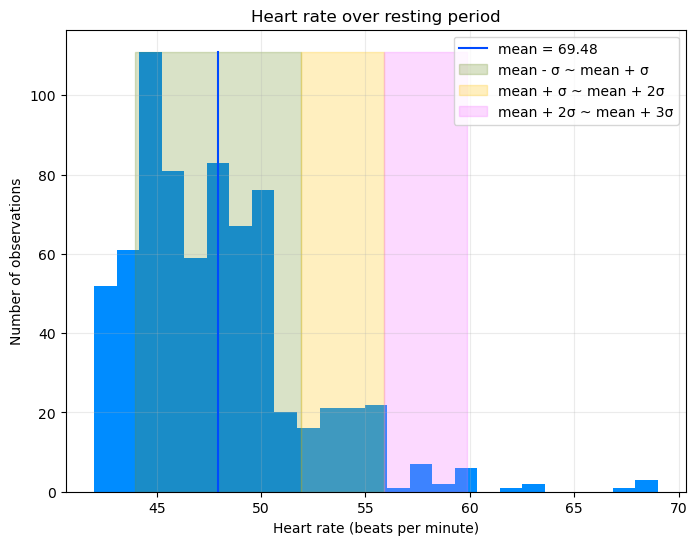

In [49]:
start_sleeping = 0
end_sleeping = np.floor(6.67/24*(hr.shape[0])).astype(int)

# assumed that a person sleeps from 22:00 to 6:40
hr_sleeping = np.concatenate((hr[start_sleeping: end_sleeping], hr[np.floor(22/24*(hr.shape[0])).astype(int): len(hr)]), axis=0)
# print(hr_sleeping.shape)
hr_sleeping_mean = hr_sleeping.mean()
hr_sleeping_std = hr_sleeping.std()


plt.figure(figsize=(8, 6), dpi=100)
plt.title('Heart rate over resting period')
hist_sleeping = plt.hist(hr_sleeping, bins='auto', color="#008CFF")
ax.set_xlim(0, 24)
ax.set_ylim(hr.min(), hr.max())
ax.set_xticks(np.arange(0, 25, 1))
ax.set_yticks(np.arange(min(hr), max(hr), 10))
plt.xlabel('Heart rate (beats per minute)')
plt.ylabel('Number of observations')

plt.plot([hr_sleeping_mean, hr_sleeping_mean], [0,hist_sleeping[0].max()], color="#004AFF", label="mean = {}".format(round(hr_mean, 2)))
plt.fill_between([hr_sleeping_mean-hr_sleeping_std, hr_sleeping_mean+hr_sleeping_std],0,hist_sleeping[0].max(), color="#6B8E23", alpha=0.25, label="mean - \u03C3 ~ mean + \u03C3".format(round((hr_sleeping_mean-hr_sleeping_std),2), round((hr_sleeping_mean+hr_sleeping_std), 2)))
plt.fill_between([hr_sleeping_mean+hr_sleeping_std, hr_sleeping_mean+2*hr_sleeping_std],0,hist_sleeping[0].max(), color="#FFC300", alpha=0.25, label="mean + \u03C3 ~ mean + 2\u03C3".format(round((hr_sleeping_mean+hr_sleeping_std), 2), round((hr_sleeping_mean+2*hr_sleeping_std), 2)))
plt.fill_between([hr_sleeping_mean+2*hr_sleeping_std, hr_sleeping_mean+3*hr_sleeping_std],0,hist_sleeping[0].max(), color="#F769FF", alpha=0.25, label="mean + 2\u03C3 ~ mean + 3\u03C3".format(round((hr_sleeping_mean+2*hr_sleeping_std), 2), round((hr_sleeping_mean+3*hr_sleeping_std), 2)))
plt.legend()

plt.grid(True, alpha=0.25)

In [50]:
# Perform Kolmogorov-Smirnov test on standardized heart rate data
# where hr_sleeping is a numpy array containing heart rate values
# zscore standardizes the heart rate data and stats.kstest performs the Kolmogorov-Smirnov test

from scipy import stats
from sklearn.preprocessing import normalize

stats.kstest(stats.zscore(hr_sleeping), 'norm')

KstestResult(statistic=0.13090515065461916, pvalue=4.101973177273132e-11)

A power transformation can help to adjust the distribution of data to a more normal shape by applying a mathematical function to each data point.

## Power Transformation


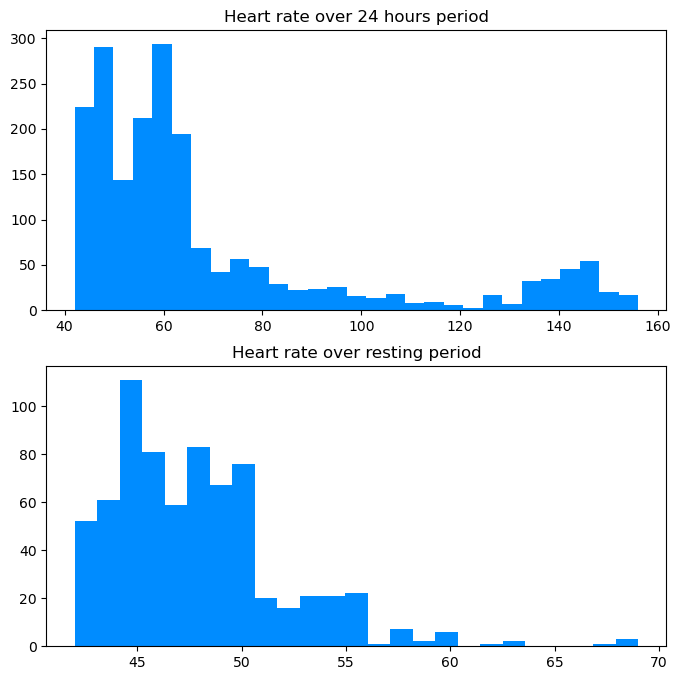

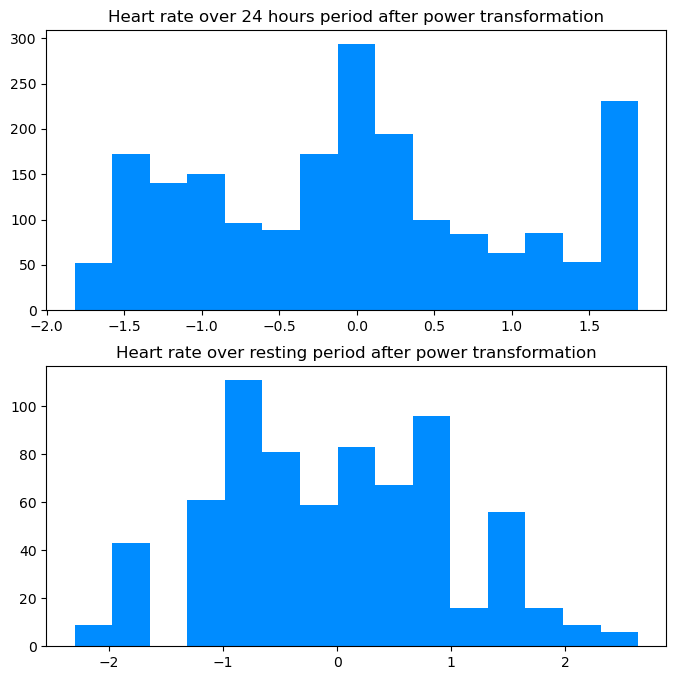

In [51]:
from sklearn.preprocessing import power_transform

# Perform power transformation on the data
power_transformed_hr_sleeping = power_transform(hr_sleeping.reshape(-1,1))
power_transformed_hr = power_transform(hr.reshape(-1,1))

# Plot the original and transformed data
fig, ax = plt.subplots(2, figsize=(8,8), dpi=100)

ax[0].hist(hr, bins='auto', color="#008CFF")
ax[0].set_title('Heart rate over 24 hours period')

ax[1].hist(hr_sleeping, bins='auto', color="#008CFF")
ax[1].set_title('Heart rate over resting period')

fig, ax = plt.subplots(2, figsize=(8,8), dpi=100)

ax[0].hist(power_transformed_hr, bins='auto', color="#008CFF")
ax[0].set_title('Heart rate over 24 hours period after power transformation')

ax[1].hist(power_transformed_hr_sleeping, bins='auto', color="#008CFF")
ax[1].set_title('Heart rate over resting period after power transformation')

plt.show()



After applying the power transformation to the data, we can visually inspect the distribution of the transformed data and compare it to the original distribution to see if it improved normality. As you can see the power transformation has improved the symmetry and reduced the skewness, allowing for more accurate statistical analyses. This also helps when implementing the HMM model.

#### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

Hint: Look at the points with a sharp transition. What does the moving average do here?

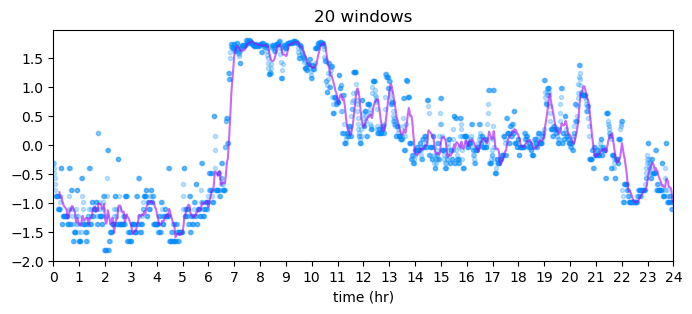

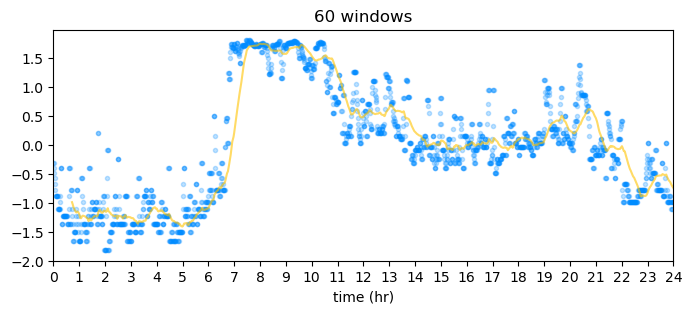

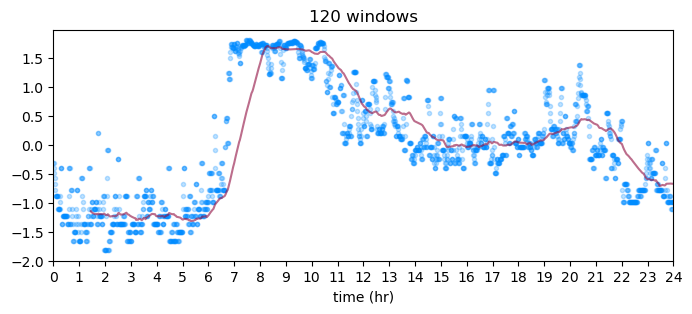

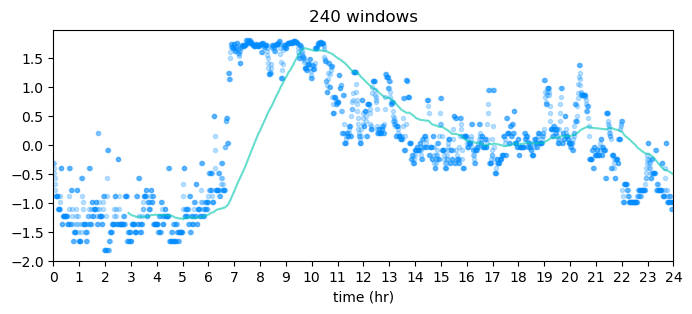

In [52]:
import pandas as pd

df = pd.DataFrame(power_transformed_hr)

# rolling
windows = [20, 60, 120, 240]
colors = ["#A109F6", "#FFC300", "#900C3F", "#00C7B0"]

for i, color in zip(windows, colors):
    hr_rolling = df.rolling(i).mean()
    plt.figure(figsize=(8, 3), dpi=100)
    plt.title(f"{i} windows")
    plt.plot(time, power_transformed_hr, '.', color="#008CFF", alpha=0.25)
    plt.plot(time, hr_rolling, color=color, alpha=0.6)
    plt.xticks(np.arange(0, 25, 1))
    plt.xlim(0, 24)
    plt.xlabel('time (hr)')


Using a moving average is an effective way to eliminate noise in data. Nonetheless, when the size of the window is increased, a greater amount of data is lost. This is due to the fact that larger windows involve the averaging of more data points, leading to a loss of detail.





#### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

- Initial probabilities refer to the likelihood of being in a specific state at the start of a system. The sum of all initial probabilities should add up to 1.

- Transition probabilities indicate the likelihood of moving from one state to another. The sum of all transition probabilities that lead to a particular state should add up to 1.

- Emission probabilities are the chances of obtaining a specific observation within the observable range of data, given a particular state. The sum of all emission probabilities for each observation corresponding to a state should be equal to 1.

#### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

How does the model respond to rapid state changes? Overlay the raw measurements and HMM state over time.

In [53]:
hr_HMM_input = np.reshape(power_transformed_hr, newshape=(len(hr),1))

model = GaussianHMM(n_components=3, covariance_type='full', random_state=42).fit(hr_HMM_input)
hidden_states = model.predict(hr_HMM_input)

# calculate means and standard deviation of each hidden state
print("\nMeans and standard deviation of each hidden state:")
for i in range(model.n_components):
    print(f"\nHidden state {i+1}")
    print("mean:", model.means_[i][0])
    print("std: ", model.covars_[i][0][0]**(0.5))
    
model_decode_state = model.decode(hr_HMM_input)[1]

# define model_means array to display on the plot
model_means = np.zeros(len(hr))
for i in range(len(hr)):
    if model_decode_state[i] == 0:
        model_means[i] = model.means_[0]
    if model_decode_state[i] == 1:
        model_means[i] = model.means_[1]  
    if model_decode_state[i] == 2:
        model_means[i] = model.means_[2]
        
print(model_means)



Means and standard deviation of each hidden state:

Hidden state 1
mean: 1.0006599583895976
std:  0.6098065242652615

Hidden state 2
mean: 0.9934355910063963
std:  0.6117563058225028

Hidden state 3
mean: -0.6430013677761434
std:  0.591453330047556
[-0.64300137 -0.64300137 -0.64300137 ... -0.64300137 -0.64300137
 -0.64300137]


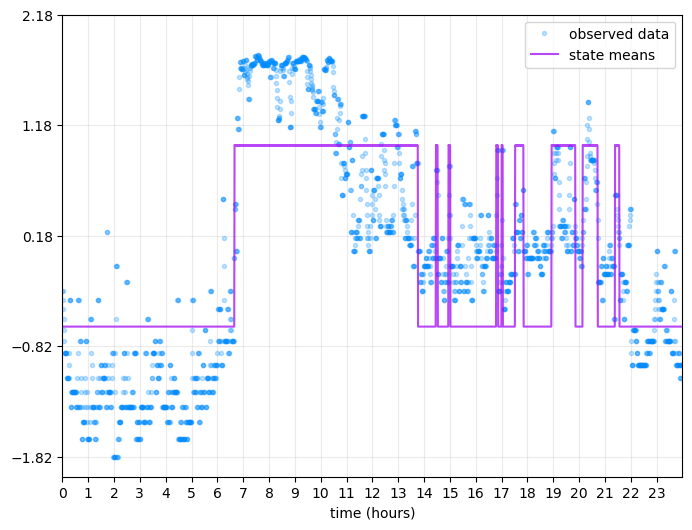

In [54]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(time, power_transformed_hr, '.', color="#008CFF", alpha=0.25, label='observed data')
plt.plot(time, model_means, color="#A109F6", alpha=0.75, label='state means')

plt.xticks(np.arange(0, 24, 1))
plt.yticks(np.arange(min(power_transformed_hr), max(power_transformed_hr)+1, 1))
plt.grid(True, alpha=0.25)
plt.xlim(0, 24)
plt.legend()
plt.xlabel('time (hours)')

plt.show()

The model can quickly identify and adapt to sudden changes in state, particularly when the heart rate sharply rises from sleeping to active states. However, the model is not as effective in handling gradual changes in data, as it occasionally transitions into other states during the first 500 data points and from data points 1000-1700. Although these states may be correct, they are unlikely to occur in real human behavior, such as waking up several times for an hour at night or sudden bursts of physical activity throughout the day.





#### (7) From the HMM model determine when you think the subject woke up in the morning. Compare this prediction to the data you obtain with the moving average.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

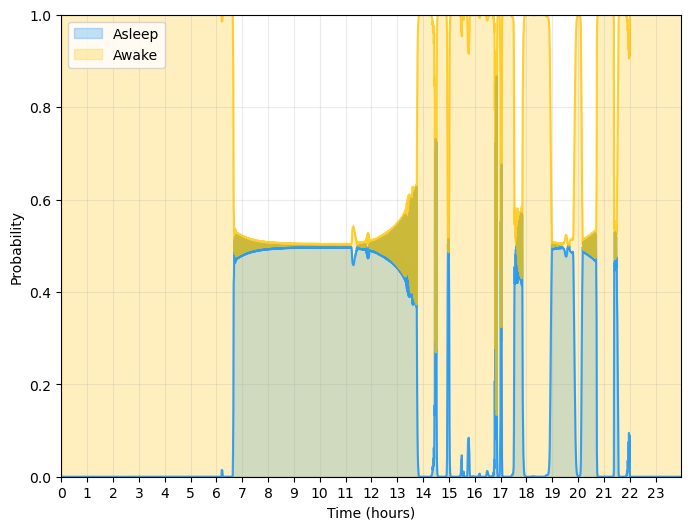

In [55]:
pred1, pred2, pred3 = zip(*model.predict_proba(power_transformed_hr))
prediction_asleep = pred1
prediction_awake = [x + y for x, y in zip(pred2, pred3)]

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(time, prediction_asleep, color="#008CFF", alpha=0.75)
plt.fill_between(time, 0, prediction_asleep, alpha=0.25, color="#008CFF", label="Asleep")

plt.plot(time, prediction_awake, color="#FFC300", alpha=0.75)
plt.fill_between(time, 0, prediction_awake, alpha=0.25, color="#FFC300", label="Awake")


plt.xticks(np.arange(0, 24, 1))
plt.grid(True, alpha=0.25)
plt.xlim(0, 24)
plt.ylim(0, 1)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Time (hours)')

plt.show()




#### (8) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your HMM model?

The data regarding a person's movements and breathing will be crucial in determining their sleep status. When a person is still and their breathing is consistent during the night, a smart watch can verify the conclusion reached by the HMM model that the person is asleep, as breathing tends to be more erratic when we are awake.



